In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
%matplotlib inline  


In [38]:
run = json.load(open("../data/llm/oa_works.json", "r"))

In [67]:
arxiv_meta = json.load(open("../data/llm/arxiv-meta-llm.json", "r"))

In [94]:
# arxiv_meta

In [61]:
import pickle
# oa_works = pickle.load(open("../data/llm/oa_works.pkl", "rb"))
dataset = pickle.load(open("../data/llm/final_dataset.pkl", "rb"))

In [78]:
final_dataset_with_metadata = json.load(open("../data/llm/final_dataset_with_metadata.json", "r"))

In [89]:
final_dataset_with_metadata['2111.02080']['metadata']

{'id': '2111.02080v6',
 'submitter': 'Tengyu Ma',
 'authors': 'Sang Michael Xie, Aditi Raghunathan, Percy Liang, Tengyu Ma',
 'title': 'An Explanation of In-context Learning as Implicit Bayesian Inference',
 'comments': 'Large language models (LMs) such as GPT-3 have the surprising ability to do\nin-context learning, where the model learns to do a downstream task simply by\nconditioning on a prompt consisting of input-output examples. The LM learns\nfrom these examples without being explicitly pretrained to learn. Thus, it is\nunclear what enables in-context learning. In this paper, we study how\nin-context learning can emerge when pretraining documents have long-range\ncoherence. Here, the LM must infer a latent document-level concept to generate\ncoherent next tokens during pretraining. At test time, in-context learning\noccurs when the LM also infers a shared latent concept between examples in a\nprompt. We prove when this occurs despite a distribution mismatch between\nprompts and 

In [71]:
# final_dataset_with_metadata['2111.02080']['metadata']

In [ ]:
data = oa_works[arxiv_id]
blocks = parse_latex(arxiv_id, data["paper"], data["title"], data["publication_date"])


In [86]:
for arxiv_id in final_dataset_with_metadata.keys():
    metadata = arxiv_meta[arxiv_id]
    final_dataset_with_metadata[arxiv_id]['metadata'] = metadata
    for block in final_dataset_with_metadata[arxiv_id]['blocks']:
        block['document_title'] = metadata['title']
        block['publication_date'] = metadata['update_date'].split("T")[0]


In [87]:
with open('../data/llm/final_dataset_with_metadata.json', 'w') as f:
    json.dump(final_dataset_with_metadata, f)


In [27]:
buyers = run['buyer_agents']
vendors = run['vendor_agents']

In [33]:
arxiv_id = "2111.02080"
for vendor in vendors:
    for block in (vendor['principal']['public_blocks'] + vendor['principal']['private_blocks']):
        print( block['block_id'].split("/")[0])
        if arxiv_id == block['block_id'].split("/")[0]:
            print("!!!")
        break
    break

2306.01761


In [7]:
credits = [vendor.get('credit') for vendor in vendors if vendor.get('credit') != 0.0]

Text(0.5, 1.0, 'Vendor Wealth')

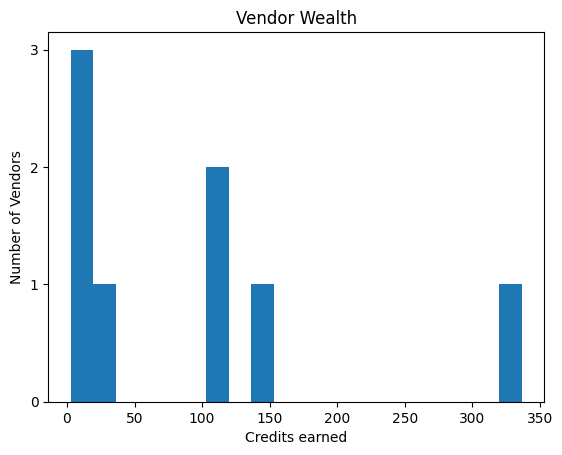

In [8]:
ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.hist(credits, bins=20)
plt.xlabel("Credits earned")
plt.ylabel("Number of Vendors")
plt.title("Vendor Wealth")

In [9]:
type([buyer['principal']['answer']['success'] for buyer in buyers][0])

bool

In [10]:
all_relevance_scores_of_rejected_quotes = []
relevance_scores_of_rejected_quotes_for_successful_queries = []
relevance_scores_of_rejected_quotes_for_failed_queries = []
relevance_scores_of_accepted_quotes = []
rej_len = []
acp_len = []
for buyer in buyers:
    query_success = buyer['principal']['answer']['success']
    query = buyer['submitted_queries'][0]
    accepted_quotes = buyer['accepted_quotes']
    rejected_quotes = buyer['rejected_quotes']
    gold_block_id = query['gold_block_id']
    gold_block_in_rejected_quotes = False
    relevance_scores_of_rejected_quotes = []
    for q in rejected_quotes:
        for answer_block in q['answer_blocks']:
            if answer_block['block_id'] == gold_block_id:
                gold_block_in_rejected_quotes = True
            rej_len.append(len(answer_block['content']))
        relevance_scores_of_rejected_quotes.append(q['relevance_scores'][0])
        if query_success:
            relevance_scores_of_rejected_quotes_for_successful_queries.extend(relevance_scores_of_rejected_quotes)
        else:
            relevance_scores_of_rejected_quotes_for_failed_queries.extend(relevance_scores_of_rejected_quotes)
    for q in accepted_quotes:
        relevance_scores_of_accepted_quotes.append(q['relevance_scores'][0])
        for answer_block in q['answer_blocks']:
            acp_len.append(len(answer_block['content']))
    all_relevance_scores_of_rejected_quotes.append(relevance_scores_of_rejected_quotes)

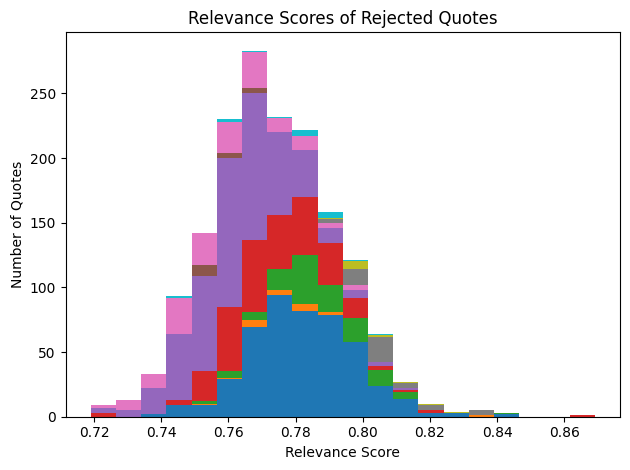

In [11]:
colors = plt.cm.tab10(np.linspace(0, 1, len(all_relevance_scores_of_rejected_quotes)))

plt.hist(all_relevance_scores_of_rejected_quotes, stacked=True, bins=20, color=colors)
plt.title("Relevance Scores of Rejected Quotes")
plt.xlabel("Relevance Score")
plt.ylabel("Number of Quotes")
# Adjust spacing and show plot
plt.tight_layout()
plt.show()


/Users/martinweiss/PycharmProjects/tn-learn/venv/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


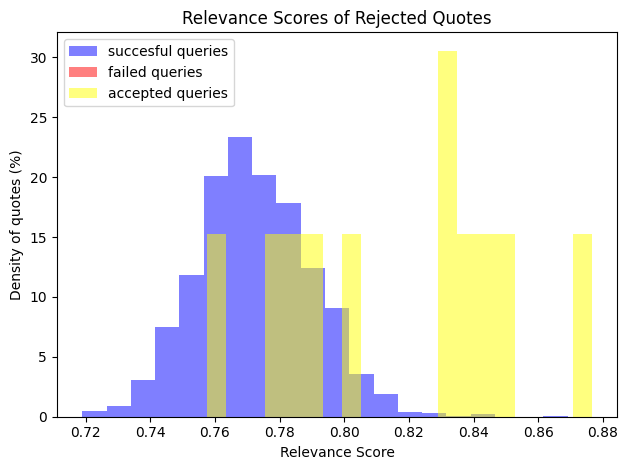

In [12]:
colors = plt.cm.tab10(np.linspace(0, 1, 2))

plt.hist(relevance_scores_of_rejected_quotes_for_successful_queries, stacked=False, bins=20, density=True, alpha=0.5, color="blue", label="succesful queries")
plt.hist(relevance_scores_of_rejected_quotes_for_failed_queries, stacked=False, bins=20,density=True, alpha=0.5, color="red", label="failed queries")
plt.hist(relevance_scores_of_accepted_quotes, stacked=False, bins=20, alpha=0.5, density=True, color="yellow", label="accepted queries")

plt.title("Relevance Scores of Rejected Quotes")
plt.xlabel("Relevance Score")
plt.ylabel("Density of quotes (%)")
plt.legend()
# Adjust spacing and show plot
plt.tight_layout()
plt.show()


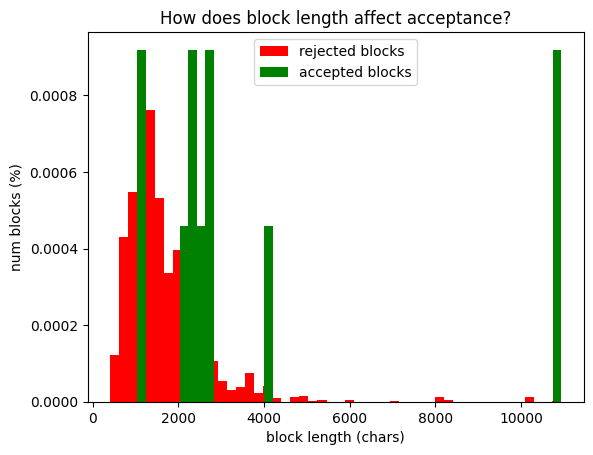

In [13]:
plt.hist(rej_len, bins=50, density=True, color="red", label="rejected blocks")
plt.hist(acp_len, bins=50, density=True, color="green", label="accepted blocks")
plt.title("How does block length affect acceptance?")
plt.xlabel("block length (chars)")
plt.ylabel("num blocks (%)")
plt.legend()

In [18]:
for buyer in buyers:
    query_success = buyer['principal']['answer']['success']
    query = buyer['submitted_queries'][0]
    accepted_quotes = buyer['accepted_quotes']
    rejected_quotes = buyer['rejected_quotes']
    gold_block_id = query['gold_block_id']
    gold_block_in_rejected_quotes = False
    relevance_scores_of_rejected_quotes = []
    print(buyer.keys())
    break



dict_keys(['agent_status', 'credit', 'called_count', 'principal', 'accepted_quotes', 'rejected_quotes', 'submitted_queries', 'quote_inbox'])


In [14]:
run.keys()

dict_keys(['buyer_agents', 'vendor_agents'])

In [2]:
summary = json.load(open("../runs/2023-09-03-18-43-40/bazaar_summary.json", "r"))
evaluation = json.load(open("../runs/2023-09-03-18-43-40/evaluation.json", "r"))

In [3]:
num_blocks = {b['principal']['name']: len(b['principal']['answer']['blocks']) for b in summary['buyer_agents'] if b['principal']['answer'] is not None}

In [16]:
import sys
!{sys.executable} -m pip install arxiv


  Using cached arxiv-1.4.8-py3-none-any.whl (12 kB)
You should consider upgrading via the '/Users/martinweiss/PycharmProjects/tn-learn/venv/bin/python -m pip install --upgrade pip' command.


In [17]:
import arxiv


In [18]:
import pandas as pd
flattened_dicts = []
for b in evaluation['buyer_agents']:
    flattened = {}
    for k, v in b.items():
        if isinstance(v, dict):
            for sub_k, sub_v in v.items():
                flattened[f"{k}/{sub_k}"] = sub_v
        else:
            flattened[k] = v
    flattened['num_block'] = num_blocks[b['name']]
    flattened_dicts.append(flattened)

# Convert to DataFrame
df = pd.DataFrame(flattened_dicts)

# Statistical analysis
summary = df.describe()


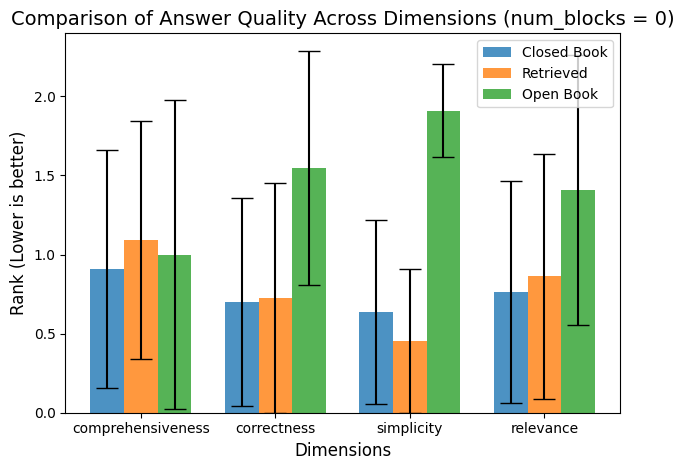

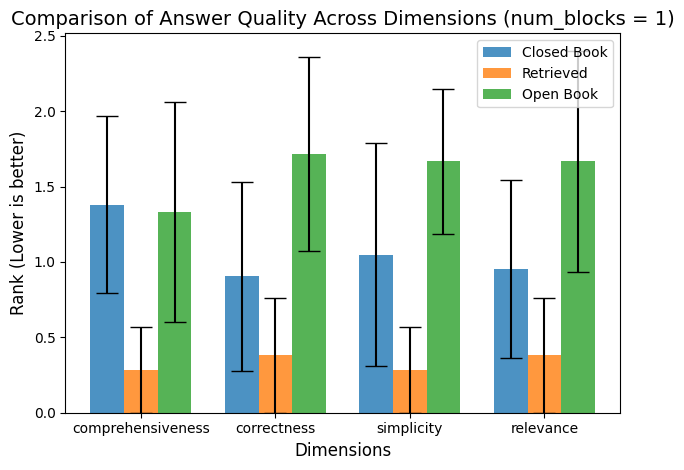

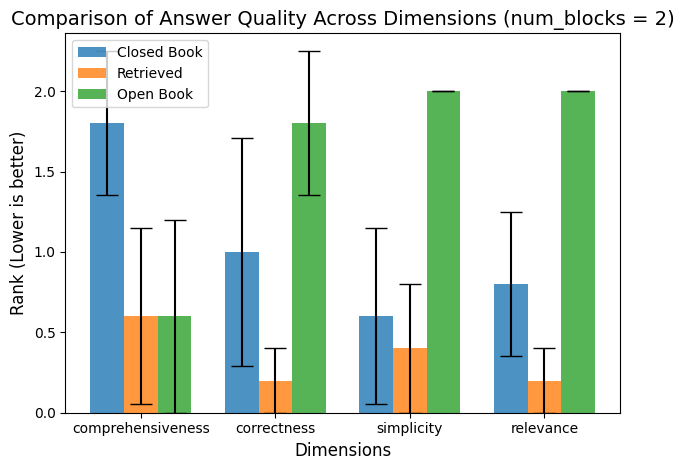

In [107]:
grouped_data = df.groupby('num_block')

# Iterate through each group to plot
for name, group in grouped_data:
    closed_book_means = group[[f'closed_book_answer_quality/{dim}' for dim in dimensions]].mean()
    open_book_means = group[[f'open_book_answer_quality/{dim}' for dim in dimensions]].mean()
    retrieved_means = group[[f'retrieved_answer_quality/{dim}' for dim in dimensions]].mean()

    closed_book_stds = group[[f'closed_book_answer_quality/{dim}' for dim in dimensions]].std()
    open_book_stds = group[[f'open_book_answer_quality/{dim}' for dim in dimensions]].std()
    retrieved_stds = group[[f'retrieved_answer_quality/{dim}' for dim in dimensions]].std()

    closed_book_error = np.minimum(closed_book_means, closed_book_stds)
    open_book_error = np.minimum(open_book_means, open_book_stds)
    retrieved_error = np.minimum(retrieved_means, retrieved_stds)

    # Create bar plot
    fig, ax = plt.subplots()

    plt.bar(index, closed_book_means, bar_width, label='Closed Book', alpha=0.8, yerr=closed_book_error, capsize=8)
    plt.bar(index + bar_width, retrieved_means, bar_width, label='Retrieved', alpha=0.8, yerr=retrieved_error, capsize=8)
    plt.bar(index + bar_width * 2, open_book_means, bar_width, label='Open Book', alpha=0.8, yerr=open_book_error, capsize=8)

    # Add labels and title
    plt.xlabel('Dimensions', fontsize=12)
    plt.ylabel('Rank (Lower is better)', fontsize=12)
    plt.title(f'Comparison of Answer Quality Across Dimensions (num_blocks = {name})', fontsize=14)
    plt.xticks(index + bar_width, dimensions)
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()


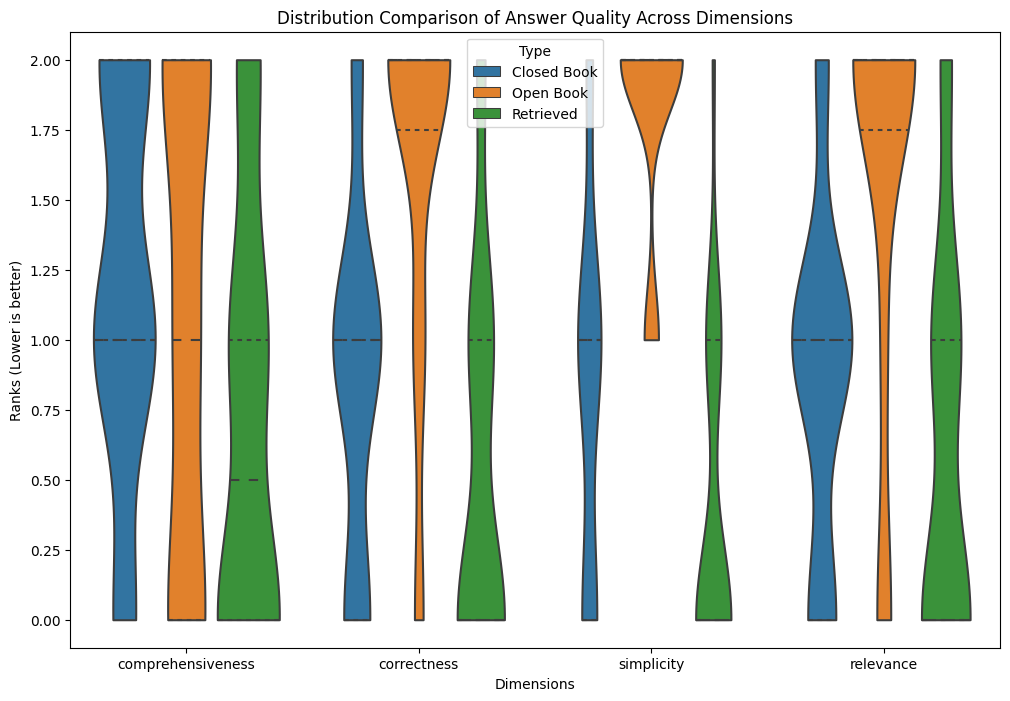

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data
dimensions = ['comprehensiveness', 'correctness', 'simplicity', 'relevance']
reshaped_data = []

for dim in dimensions:
    for idx, row in df.iterrows():
        reshaped_data.append({'Dimension': dim, 'Type': 'Closed Book', 'Value': row[f'closed_book_answer_quality/{dim}']})
        reshaped_data.append({'Dimension': dim, 'Type': 'Open Book', 'Value': row[f'open_book_answer_quality/{dim}']})
        reshaped_data.append({'Dimension': dim, 'Type': 'Retrieved', 'Value': row[f'retrieved_answer_quality/{dim}']})

reshaped_df = pd.DataFrame(reshaped_data)

# Create violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Dimension', y='Value', hue='Type', data=reshaped_df, inner='quartile', cut=0)
plt.title('Distribution Comparison of Answer Quality Across Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('Ranks (Lower is better)')
plt.legend(title='Type')
plt.show()


In [111]:
df

,name,question_text,max_budget,credit_left,successfully_answered,answer_text,gold_block_ware_specs,gold_block_content,gold_block_rejected,retrieved_answer_quality/comprehensiveness,...,open_book_answer_quality/correctness,open_book_answer_quality/simplicity,open_book_answer_quality/relevance,closed_book_answer_quality/comprehensiveness,closed_book_answer_quality/correctness,closed_book_answer_quality/simplicity,closed_book_answer_quality/relevance,open_book_answer,closed_book_answer,num_block
0,buyer-2111.02080/Discussion and related work/3...,What is the difference between in-context lear...,10.110761,1.345996,True,In-context learning and traditional machine le...,[{'block_id': '2111.02080/Discussion and relat...,Bridging the mismatch between pretraining and ...,False,1,...,0,2,0,2,2.0,1,2.0,The passage does not directly mention the diff...,In-context learning and traditional machine le...,1
1,buyer-2111.02080/Discussion and related work/3...,Can you explain the concept of meta-learning i...,473.763141,456.291673,True,Meta-learning is a concept that enables langua...,[{'block_id': '2111.02080/Discussion and relat...,Bridging the mismatch between pretraining and ...,False,0,...,2,1,2,1,0.0,2,0.0,"In the context of language models, meta-learni...","Meta-learning, in the context of language mode...",1
2,buyer-2105.03215/Introduction/848/957-0,What are some of the difficulties that hardwar...,32.059213,12.652663,True,Developing a full compiler stack for deep lear...,[{'block_id': '2105.03215/Introduction/848/957...,3: Demanding to execute. Even if all operators...,False,0,...,2,2,2,1,1.0,1,1.0,Some of the difficulties that hardware vendors...,Developing a full compiler stack for deep lear...,1
3,buyer-2105.03215/Introduction/848/957-1,What is the significance of decoupling the dee...,4.297801,4.297801,True,Decoupling the deep learning compiler into two...,[{'block_id': '2105.03215/Introduction/848/957...,3: Demanding to execute. Even if all operators...,False,2,...,2,2,2,0,0.0,1,0.0,The significance of decoupling the deep learni...,Decoupling the deep learning compiler into two...,0
4,buyer-2105.03215/Introduction/848/957-2,How does the unified framework benefit hardwar...,136.381119,120.451069,True,The unified framework benefits hardware vendor...,[{'block_id': '2105.03215/Introduction/848/957...,3: Demanding to execute. Even if all operators...,False,0,...,2,1,2,1,1.0,2,1.0,The unified framework benefits hardware vendor...,The unified framework in deep learning refers ...,1
5,buyer-2105.03215/Introduction/1595/1818-0,What are some common techniques used in code g...,536.461936,536.461936,True,Code generation tools for deep learning common...,[{'block_id': '2105.03215/Introduction/1595/18...,Deep neural networks (DNNs) have been ubiquito...,False,1,...,0,2,0,2,1.0,1,2.0,The passage does not directly mention the spec...,There are several common techniques used in co...,0
6,buyer-2105.03215/Introduction/1595/1818-1,What are some advantages of using open-source ...,181.190990,170.955623,True,Open-source frameworks for deep learning devel...,[{'block_id': '2105.03215/Introduction/1595/18...,Deep neural networks (DNNs) have been ubiquito...,False,0,...,2,1,2,1,1.0,2,1.0,Some advantages of using open-source framework...,There are several advantages of using open-sou...,1
7,buyer-2105.03215/Introduction/1595/1818-2,How can developers ensure their deep learning ...,367.754536,365.880586,True,Developers can ensure their deep learning mode...,[{'block_id': '2105.03215/Introduction/1595/18...,Deep neural networks (DNNs) have been ubiquito...,False,0,...,2,2,2,2,1.0,0,1.0,"According to the passage, developers can ensur...",Developers can ensure their deep learning mode...,1
8,buyer-2105.03215/Runtime/0/169-0,What is the primary function of a deep learnin...,22.132203,22.132203,True,The primary function of a deep learning compil...,"[{'block_id': '2105.03215/Runtime/0/169', 'ven...",Most deep learning compilers employ runtime sy...,False,0,.

In [113]:
# Case 1: Open Book > Retrieved > Closed Book
case1_filter = (df['open_book_answer_quality/correctness'] > df['retrieved_answer_quality/correctness']) & \
               (df['retrieved_answer_quality/correctness'] > df['closed_book_answer_quality/correctness'])

case1_sample = df[case1_filter].sample(1, random_state=42)

# Case 2: Open Book < Retrieved < Closed Book
case2_filter = (df['open_book_answer_quality/correctness'] < df['retrieved_answer_quality/correctness']) & \
               (df['retrieved_answer_quality/correctness'] < df['closed_book_answer_quality/correctness'])

case2_sample = df[case2_filter].sample(1, random_state=42)

# Case 3: Retrieved > Open Book > Closed Book
case3_filter = (df['retrieved_answer_quality/correctness'] > df['open_book_answer_quality/correctness']) & \
               (df['open_book_answer_quality/correctness'] > df['closed_book_answer_quality/correctness'])

case3_sample = df[case3_filter].sample(1, random_state=42)

# Combine samples
final_sample_df = pd.concat([case1_sample, case2_sample, case3_sample])


In [114]:
case1_sample['Case'] = 'Case 1: Open Book > Retrieved > Closed Book'
case2_sample['Case'] = 'Case 2: Open Book < Retrieved < Closed Book'
case3_sample['Case'] = 'Case 3: Retrieved > Open Book > Closed Book'

# Combine samples and assign case labels
final_sample_df = pd.concat([case1_sample, case2_sample, case3_sample])

# Select only the columns you want to display: 'Case', 'open_book_answer', 'closed_book_answer', 'retrieved_answer'
final_table = final_sample_df[['Case', "question_text", 'open_book_answer', 'closed_book_answer', 'answer_text']]

# Print out the table
from pprint import pprint
pprint(final_table)


                                           Case  \
41  Case 1: Open Book > Retrieved > Closed Book   
0   Case 2: Open Book < Retrieved < Closed Book   
32  Case 3: Retrieved > Open Book > Closed Book   

                                        question_text  \
41  What is the name of the model that is trained ...   
0   What is the difference between in-context lear...   
32  What is the name of the technique that allows ...   

                                     open_book_answer  \
41  The name of the model that is trained using a ...   
0   The passage does not directly mention the diff...   
32  The technique that allows users to provide a r...   

                                   closed_book_answer  \
41  The name of the model that is trained using a ...   
0   In-context learning and traditional machine le...   
32  The technique that allows users to provide a r...   

                                          answer_text  
41  The model that is trained using a large unlabe..

In [115]:
final_table.to_csv('qualitative_validation_table.csv', index=False)


In [66]:
final_table

,Case,open_book_answer,closed_book_answer,answer_text
24,Case 1: Open Book > Retrieved > Closed Book,The method set new SOTA (State-of-the-Art) per...,"I'm sorry, but without specific information ab...",The method set new SOTA performance on three d...
41,Case 2: Open Book < Retrieved < Closed Book,The name of the model that is trained using a ...,The name of the model that is trained using a ...,The model that is trained using a large unlabe...
3,Case 3: Retrieved > Open Book > Closed Book,The significance of decoupling the deep learni...,Decoupling the deep learning compiler into two...,Decoupling the deep learning compiler into two...


In [67]:
case3_sample

,name,question_text,max_budget,credit_left,successfully_answered,answer_text,gold_block_ware_specs,gold_block_content,gold_block_rejected,retrieved_answer_quality/comprehensiveness,...,open_book_answer_quality/correctness,open_book_answer_quality/simplicity,open_book_answer_quality/relevance,closed_book_answer_quality/comprehensiveness,closed_book_answer_quality/correctness,closed_book_answer_quality/simplicity,closed_book_answer_quality/relevance,open_book_answer,closed_book_answer,Case
3,buyer-2105.03215/Introduction/848/957-1,What is the significance of decoupling the dee...,4.297801,4.297801,True,Decoupling the deep learning compiler into two...,[{'block_id': '2105.03215/Introduction/848/957...,3: Demanding to execute. Even if all operators...,False,2,...,2,2,2,0,0.0,1,0.0,The significance of decoupling the deep learni...,Decoupling the deep learning compiler into two...,Case 3: Retrieved > Open Book > Closed Book
